# Demo for train and test data selection

In this notebook we present general functionalities of the `sampling` module.

### Sampling

A synthetic data set is created and we perform train and test data sampling using available functions from the `TrainTestSelect` class:

- Fixed number of samples from each cluster (`TrainTestSelect.number`)
- Percentage of samples from each cluster (`TrainTestSelect.percentage`)
- Manual sampling (`TrainTestSelect.manual`)
- Random sampling (`TrainTestSelect.random`)

For each function we present visually how test data can be sampled using the available `test_selection_option` parameter.

Finally we present a use-case for maintaining fixed test data samples using the `idx_test` parameter.

***

In [1]:
from PCAfold import TrainTestSelect
import PCAfold.clustering_data as cl
import matplotlib.pyplot as plt
import numpy as np

# Set some initial parameters:
k_colors = ['#0e7da7', '#ceca70', '#b45050', '#2d2d54']
data_point = 2
font_size = 16
save_plots = False

# Function for plotting:
def plot_train_test(idx_train, idx_test, idx, x, y):
    
    figure = plt.figure(figsize=(14, 7))

    ax1 = plt.subplot(121)
    for k in range(0,4):
        train_indices = [idxt for idxt in idx_train if idx[idxt,]==k]
        ax1.scatter(x[train_indices,0], y[train_indices,0], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k+1) + '$ - ' + str(len(train_indices)))
    ax1.set_xlim([-8,8]), ax1.set_ylim([-8,8])
    ax1.set_xticks([]), ax1.set_yticks([])
    ax1.set_title('Train data', fontsize=font_size)
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=font_size-4, markerscale=4)

    ax2 = plt.subplot(1,2,2)
    for k in range(0,4):
        test_indices = [idxt for idxt in idx_test if idx[idxt,]==k]
        ax2.scatter(x[test_indices,0], y[test_indices,0], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k+1) + '$ - ' + str(len(test_indices)))
    ax2.set_xlim([-8,8]), ax2.set_ylim([-8,8])
    ax2.set_xticks([]), ax2.set_yticks([]) 
    ax2.set_title('Test data', fontsize=font_size)
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=font_size-4, markerscale=4)

Generate data set that has four distinct clusters with imbalanced number of samples in each cluster:

In [2]:
N_1, N_2, N_3, N_4 = 100, 250, 400, 500
n_observations = N_1 + N_2 + N_3 + N_4
mean_k1, mean_k2, mean_k3, mean_k4 = [-3, 3], [3, 3], [-3, -3], [3, -3] 
covariance = [[1, 0.2], [0.2, 1]]
x_k1, y_k1 = np.random.multivariate_normal(mean_k1, covariance, N_1).T
x_k2, y_k2 = np.random.multivariate_normal(mean_k2, covariance, N_2).T
x_k3, y_k3 = np.random.multivariate_normal(mean_k3, covariance, N_3).T
x_k4, y_k4 = np.random.multivariate_normal(mean_k4, covariance, N_4).T
x = np.vstack((x_k1[:,np.newaxis], x_k2[:,np.newaxis], x_k3[:,np.newaxis], x_k4[:,np.newaxis]))
y = np.vstack((y_k1[:,np.newaxis], y_k2[:,np.newaxis], y_k3[:,np.newaxis], y_k4[:,np.newaxis]))
idx = np.vstack((np.zeros((N_1, 1)), np.ones((N_2, 1)), 2*np.ones((N_3, 1)), 3*np.ones((N_4, 1)))).astype(int).ravel()
populations = cl.get_populations(idx, verbose=True)

Plot the original data set:

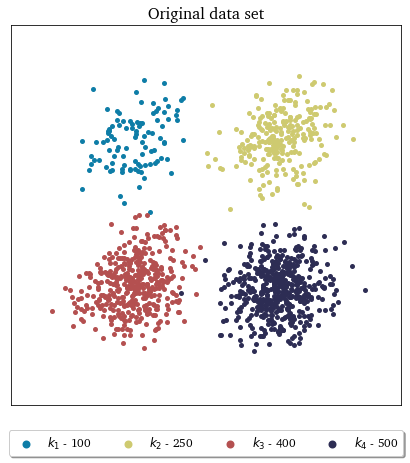

In [3]:
figure = plt.figure(figsize=(7, 7))
figureSubplot = plt.subplot(1,1,1)
for k in range(0,4):
    plt.scatter(x[np.where(idx==k)], y[np.where(idx==k)], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k+1) + '$ - ' + str(populations[k]))
plt.axis('equal')
plt.xlim([-8,8]), plt.ylim([-8,8])
plt.xticks([]), plt.yticks([])
plt.title('Original data set', fontsize=font_size)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=font_size-4, markerscale=2)
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-original-data-set.png', dpi = 500, bbox_inches='tight')

Initialize the `TrainTestSelect` class object:

In [4]:
sample = TrainTestSelect(idx, idx_test=[], bar_50=True, random_seed=None, verbose=True)

***

## Select fixed number

Using `test_selection_option=1`:

Cluster 1: taking 46 train samples out of 100 observations (46.0%).
Cluster 2: taking 46 train samples out of 250 observations (18.4%).
Cluster 3: taking 46 train samples out of 400 observations (11.5%).
Cluster 4: taking 46 train samples out of 500 observations (9.2%).

Cluster 1: taking 54 test samples out of 54 remaining observations (100.0%).
Cluster 2: taking 204 test samples out of 204 remaining observations (100.0%).
Cluster 3: taking 354 test samples out of 354 remaining observations (100.0%).
Cluster 4: taking 454 test samples out of 454 remaining observations (100.0%).

Selected 184 train samples (14.7%) and 1066 test samples (85.3%).



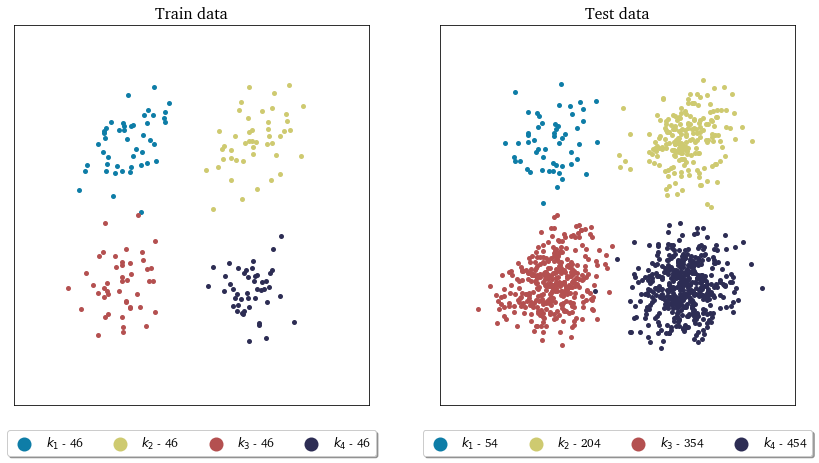

In [5]:
(idx_train, idx_test) = sample.number(15, test_selection_option=1)
plot_train_test(idx_train, idx_test, idx, x, y)
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-fixed-number-1.png', dpi = 500, bbox_inches='tight')

Using `test_selection_option=2`:

Cluster 1: taking 46 train samples out of 100 observations (46.0%).
Cluster 2: taking 46 train samples out of 250 observations (18.4%).
Cluster 3: taking 46 train samples out of 400 observations (11.5%).
Cluster 4: taking 46 train samples out of 500 observations (9.2%).

Cluster 1: taking 54 test samples out of 54 remaining observations (100.0%).
Cluster 2: taking 54 test samples out of 204 remaining observations (26.5%).
Cluster 3: taking 54 test samples out of 354 remaining observations (15.3%).
Cluster 4: taking 54 test samples out of 454 remaining observations (11.9%).

Selected 184 train samples (14.7%) and 216 test samples (17.3%).



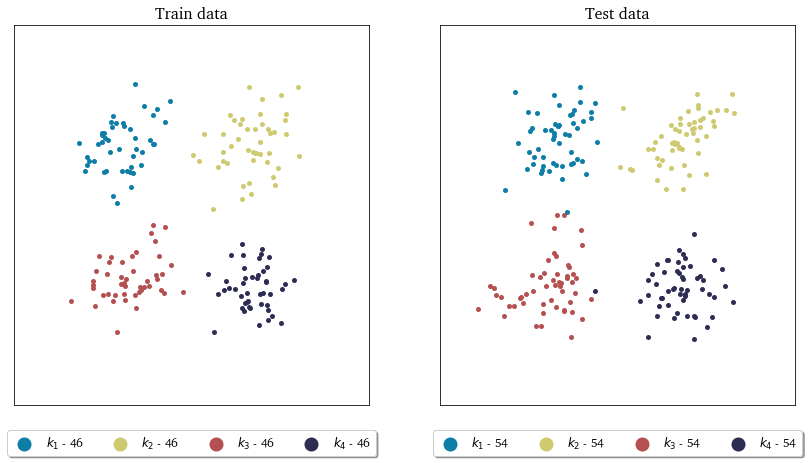

In [6]:
(idx_train, idx_test) = sample.number(15, test_selection_option=2)
plot_train_test(idx_train, idx_test, idx, x, y)
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-fixed-number-2.png', dpi = 500, bbox_inches='tight')

***

## Select fixed percentage

Cluster 1: taking 10 train samples out of 100 observations (10.0%).
Cluster 2: taking 25 train samples out of 250 observations (10.0%).
Cluster 3: taking 40 train samples out of 400 observations (10.0%).
Cluster 4: taking 50 train samples out of 500 observations (10.0%).

Cluster 1: taking 90 test samples out of 90 remaining observations (100.0%).
Cluster 2: taking 225 test samples out of 225 remaining observations (100.0%).
Cluster 3: taking 360 test samples out of 360 remaining observations (100.0%).
Cluster 4: taking 450 test samples out of 450 remaining observations (100.0%).

Selected 125 train samples (10.0%) and 1125 test samples (90.0%).



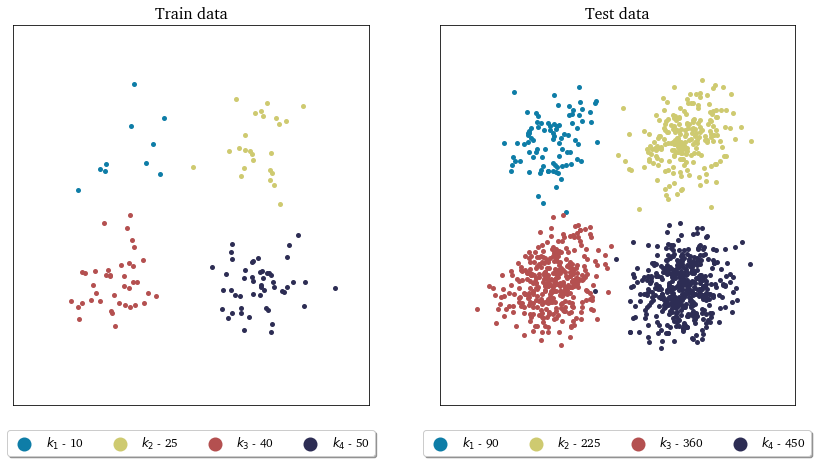

In [7]:
(idx_train, idx_test) = sample.percentage(10)
plot_train_test(idx_train, idx_test, idx, x, y)
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-fixed-percentage.png', dpi = 500, bbox_inches='tight')

***


## Select manually

Cluster 1: taking 4 train samples out of 100 observations (4.0%).
Cluster 2: taking 5 train samples out of 250 observations (2.0%).
Cluster 3: taking 10 train samples out of 400 observations (2.5%).
Cluster 4: taking 2 train samples out of 500 observations (0.4%).

Cluster 1: taking 96 test samples out of 96 remaining observations (100.0%).
Cluster 2: taking 245 test samples out of 245 remaining observations (100.0%).
Cluster 3: taking 390 test samples out of 390 remaining observations (100.0%).
Cluster 4: taking 498 test samples out of 498 remaining observations (100.0%).

Selected 21 train samples (1.7%) and 1229 test samples (98.3%).



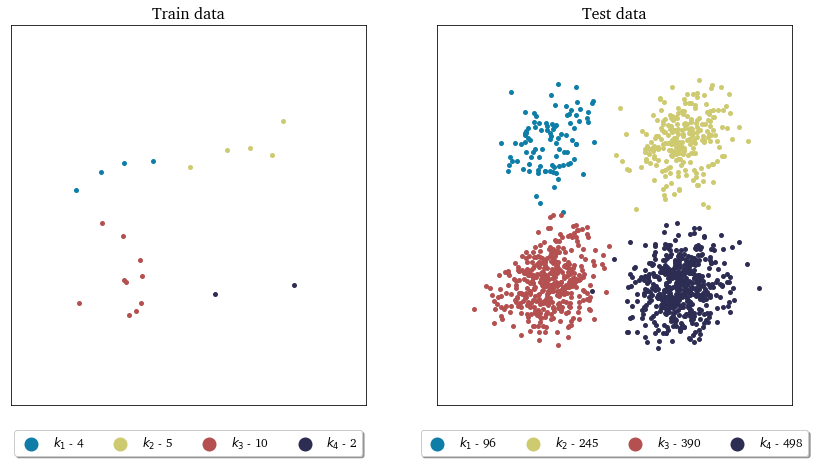

In [8]:
(idx_train, idx_test) = sample.manual({0:4, 1:5, 2:10, 3:2}, sampling_type='number')
plot_train_test(idx_train, idx_test, idx, x, y)
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-manually.png', dpi = 500, bbox_inches='tight')

***

## Select at random

Cluster 1: taking 6 train samples out of 100 observations (6.0%).
Cluster 2: taking 26 train samples out of 250 observations (10.4%).
Cluster 3: taking 38 train samples out of 400 observations (9.5%).
Cluster 4: taking 55 train samples out of 500 observations (11.0%).

Cluster 1: taking 94 test samples out of 94 remaining observations (100.0%).
Cluster 2: taking 224 test samples out of 224 remaining observations (100.0%).
Cluster 3: taking 362 test samples out of 362 remaining observations (100.0%).
Cluster 4: taking 445 test samples out of 445 remaining observations (100.0%).

Selected 125 train samples (10.0%) and 1125 test samples (90.0%).



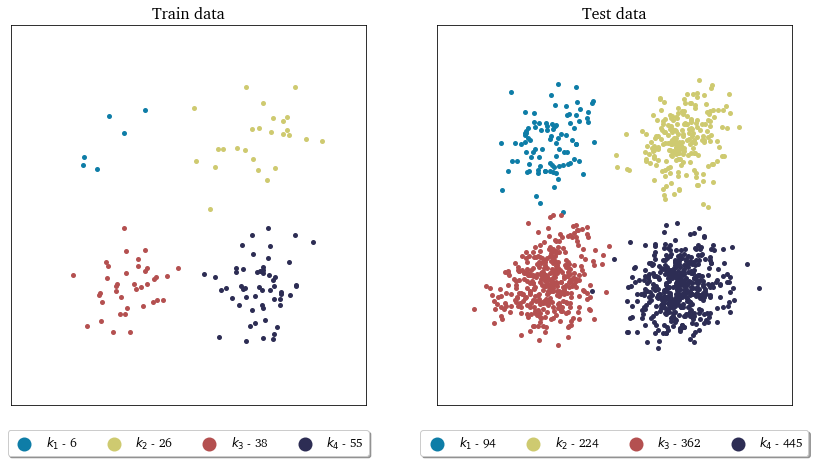

In [9]:
(idx_train, idx_test) = sample.random(10)
plot_train_test(idx_train, idx_test, idx, x, y)
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-random-doc.png', dpi = 500, bbox_inches='tight')

***

## Maintain fixed test data

In the example below we further illustrate how the `idx_test` input parameter can be utilized when initializing `TrainTestSelect` class.
For that purpose we append the data set with additional samples. The additional samples simulate a real use-case where you have a very specific test set that you would like to maintain.

We use `TrainTestSelect.random` sampling function in this example, but any other function can be used as well.

In [10]:
Nt_1, Nt_2, Nt_3, Nt_4 = 20, 20, 20, 20
mean_k1, mean_k2, mean_k3, mean_k4 = [-7, 7], [7, 7], [-7, -7], [7, -7]
covariance = [[0.2, .1], [.1, 0.2]]
xt_k1, yt_k1 = np.random.multivariate_normal(mean_k1, covariance, Nt_1).T
xt_k2, yt_k2 = np.random.multivariate_normal(mean_k2, covariance, Nt_2).T
xt_k3, yt_k3 = np.random.multivariate_normal(mean_k3, covariance, Nt_3).T
xt_k4, yt_k4 = np.random.multivariate_normal(mean_k4, covariance, Nt_4).T
xt = np.vstack((xt_k1[:,np.newaxis], xt_k2[:,np.newaxis], xt_k3[:,np.newaxis], xt_k4[:,np.newaxis], x))
yt = np.vstack((yt_k1[:,np.newaxis], yt_k2[:,np.newaxis], yt_k3[:,np.newaxis], yt_k4[:,np.newaxis], y))
idx = np.vstack((np.zeros((Nt_1, 1)), np.ones((Nt_2, 1)), 2*np.ones((Nt_3, 1)), 3*np.ones((Nt_4, 1)), np.zeros((N_1, 1)), np.ones((N_2, 1)), 2*np.ones((N_3, 1)), 3*np.ones((N_4, 1)))).astype(int).ravel()
idx_test = np.arange(0,Nt_1+Nt_2+Nt_3+Nt_4,1)
populations = cl.get_populations(idx, verbose=True)

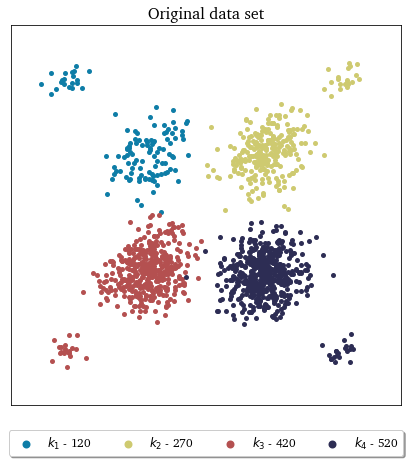

In [11]:
figure = plt.figure(figsize=(7, 7))
figureSubplot = plt.subplot(1,1,1)
for k in range(0,4):
    plt.scatter(xt[np.where(idx==k)], yt[np.where(idx==k)], color=k_colors[k], marker='.', linewidth=data_point, label='$k_' + str(k+1) + '$ - ' + str(populations[k]))
plt.axis('equal')
plt.xlim([-10,10]), plt.ylim([-10,10])
plt.xticks([]), plt.yticks([])
plt.title('Original data set', fontsize=font_size)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=font_size-4, markerscale=2)
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-original-data-set-appended-doc.png', dpi = 500, bbox_inches='tight')

Initialize the `TrainTestSelect` class object using `idx_test` as an input parameter:

In [12]:
sample = TrainTestSelect(idx, idx_test=idx_test, bar_50=True, random_seed=None, verbose=True)

Select at random using `idx_test` input parameter:

Cluster 1: taking 78 train samples out of 120 observations (65.0%).
Cluster 2: taking 218 train samples out of 270 observations (80.7%).
Cluster 3: taking 341 train samples out of 420 observations (81.2%).
Cluster 4: taking 427 train samples out of 520 observations (82.1%).

Cluster 1: taking 20 test samples out of 42 remaining observations (47.6%).
Cluster 2: taking 20 test samples out of 52 remaining observations (38.5%).
Cluster 3: taking 20 test samples out of 79 remaining observations (25.3%).
Cluster 4: taking 20 test samples out of 93 remaining observations (21.5%).

Selected 1064 train samples (80.0%) and 80 test samples (6.0%).



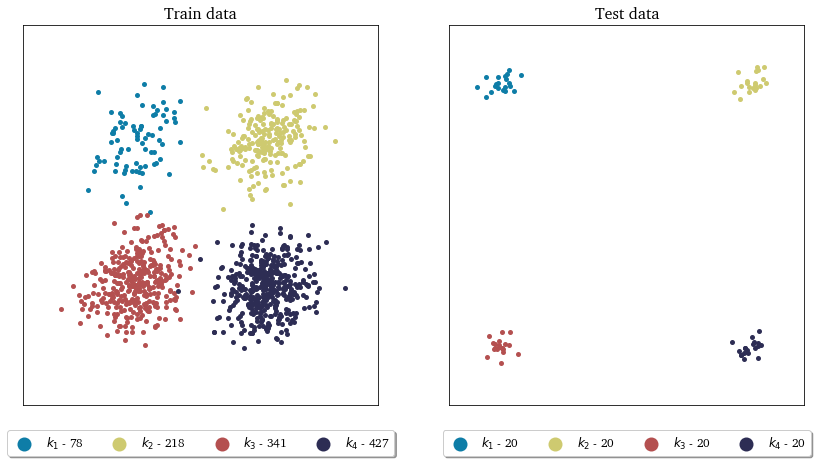

In [13]:
(idx_train, idx_test) = sample.random(80)
plot_train_test(idx_train, idx_test, idx, xt, yt)
plt.xlim([-10,10]), plt.ylim([-10,10])
if save_plots==True: plt.savefig('../images/tutorial-train-test-select-random-with-idx-test-doc.png', dpi = 500, bbox_inches='tight')